In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn

seaborn.set_context('talk')

In [2]:
df = pd.read_csv('deaths_month_age.csv')
df.set_index(['Jahr', 'Alter'], inplace=True)

In [3]:
df

Januar  Februar     März    April      Mai     Juni     Juli  \
Jahr Alter                                                                 
2023 0-15      289      279      NaN      NaN      NaN      NaN      NaN   
     15-30     319      297      NaN      NaN      NaN      NaN      NaN   
     30-35     245      188      NaN      NaN      NaN      NaN      NaN   
     35-40     323      329      NaN      NaN      NaN      NaN      NaN   
     40-45     532      510      NaN      NaN      NaN      NaN      NaN   
...            ...      ...      ...      ...      ...      ...      ...   
2016 75-80   12388    11644  12850.0  11600.0  11181.0  10740.0  10957.0   
     80-85   13721    12988  14230.0  12632.0  12915.0  11729.0  12264.0   
     85-90   15688    14556  15697.0  14250.0  13977.0  12588.0  13338.0   
     90-95   11244    10304  11333.0  10022.0   9818.0   8960.0   9401.0   
     95+      3839     3569   3954.0   3621.0   3588.0   3287.0   3417.0   

             August  September  Oktober  November  Dezember  
Jahr Alter                                                   
2023 0-15       NaN        NaN      NaN       NaN       NaN  
     15-30      NaN        NaN      NaN       NaN       NaN  
     30-35      NaN        NaN      NaN       NaN       NaN  
     35-40      NaN        NaN      NaN       NaN       NaN  
     40-45      NaN        NaN      NaN       NaN       NaN  
...             ...        ...      ...       ...       ...  
2016 75-80  10844.0    10483.0  11566.0   11709.0   12805.0  
     80-85  12238.0    11770.0  13147.0   13534.0   14704.0  
     85-90  13145.0    12929.0  14189.0   14629.0   16123.0  
     90-95   9243.0     9004.0  10221.0   10446.0   11830.0  
     95+     3465.0     3345.0   3802.0    4015.0    4451.0  

[128 rows x 12 columns]

(2015.5, 2022.5)

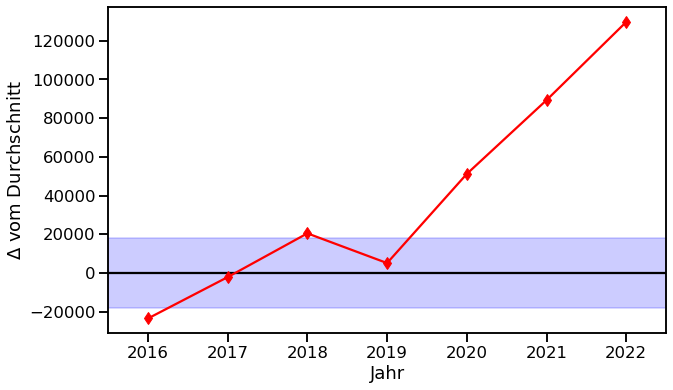

In [4]:
fig, axes = plt.subplots(ncols = 1, nrows = 1, figsize = (10, 6))

#dropping 2023:
years = df.dropna().groupby('Jahr').sum()

#selecting 2016-2019 as standard:
pre_pandemic_years = years.index[:4]

years_sum = years.transpose().sum()
years_mean = years_sum.loc[pre_pandemic_years].mean()
years_std = years_sum.loc[pre_pandemic_years].std()

xlims = (2015.5, 2022.5)

axes.fill_between(xlims,
                -years_std,
                years_std,
                color ='blue',
                alpha = 0.2)

axes.plot(xlims, np.zeros(len(xlims)), 'k-')
axes.plot(years_sum - years_mean, 'rd', linestyle = '-')
axes.set_ylabel(u'$\Delta$ vom Durchschnitt')
axes.set_xlabel('Jahr')
axes.set_xlim(xlims)

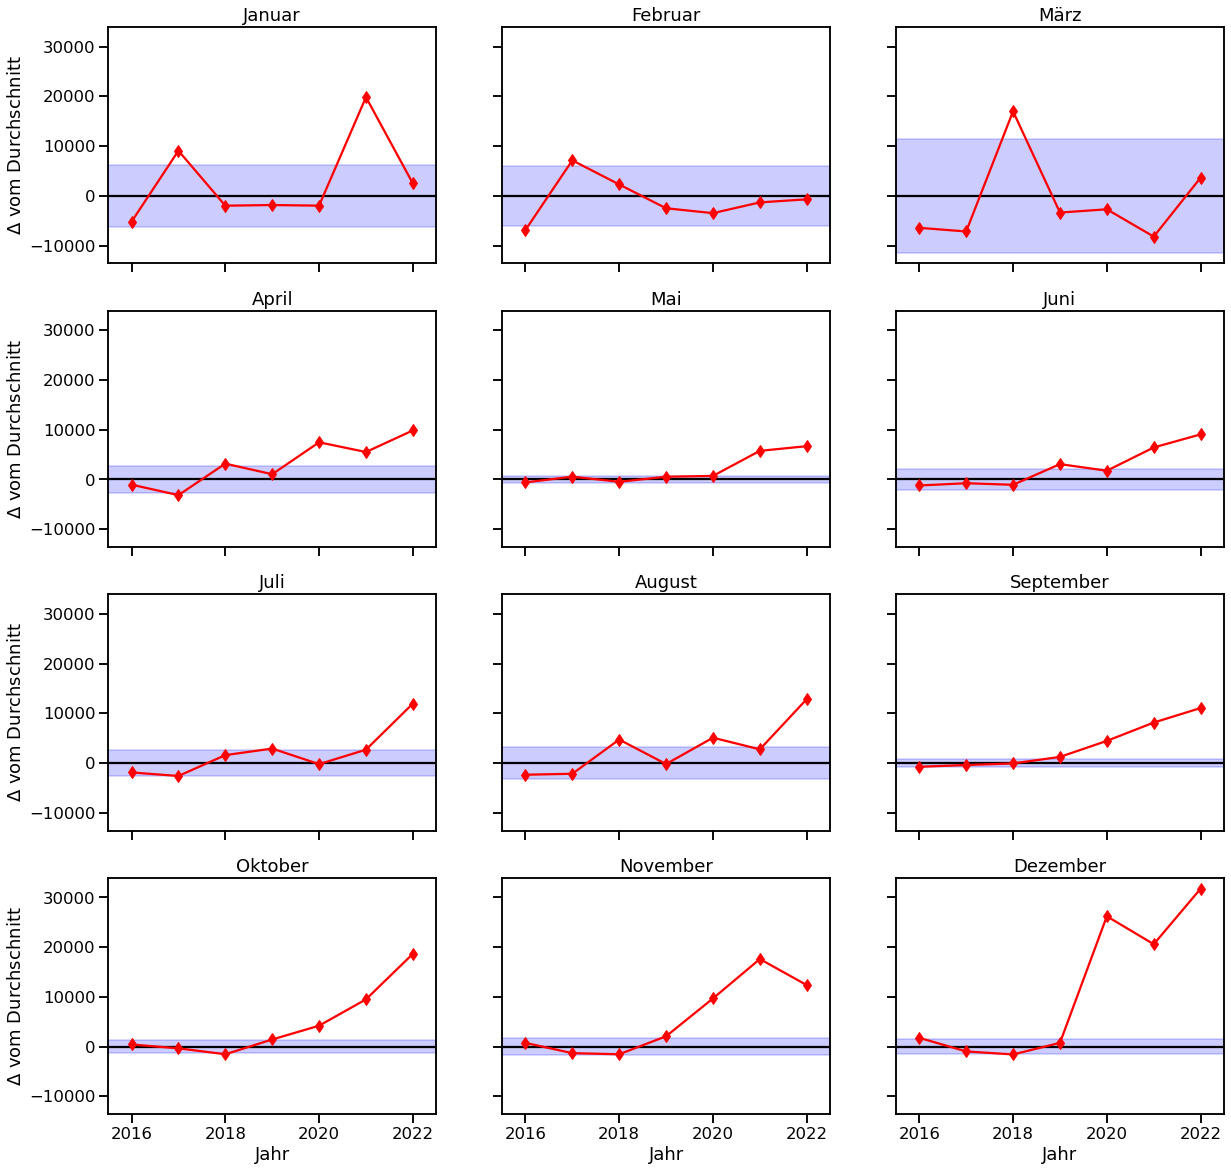

In [5]:
fig, axes = plt.subplots(ncols = 3, nrows = 4, figsize = (20, 20), sharex = True, sharey=True)
years = df.dropna().groupby('Jahr').sum()

pre_pandemic_years = years.index[:4]
xlims = (2015.5, 2022.5)

for month, ax in zip(years.columns, axes.ravel()):

    month_mean = years.loc[pre_pandemic_years][month].mean()
    month_std =  years.loc[pre_pandemic_years][month].std()
    
    ax.plot(xlims, 
             np.zeros(len(xlims)),
            'k-')
    
    (years[month] - month_mean).plot(marker = 'd', 
                                    linestyle = '-', 
                                    color = 'red',
                                    ax = ax)
    
    ax.fill_between(xlims, 
                    -month_std, 
                     month_std, 
                    color ='blue',
                   alpha = 0.2)
    
    ax.set_title(month)
    ax.set_ylabel(u'$\Delta$ vom Durchschnitt')
    ax.set_xlim(xlims)

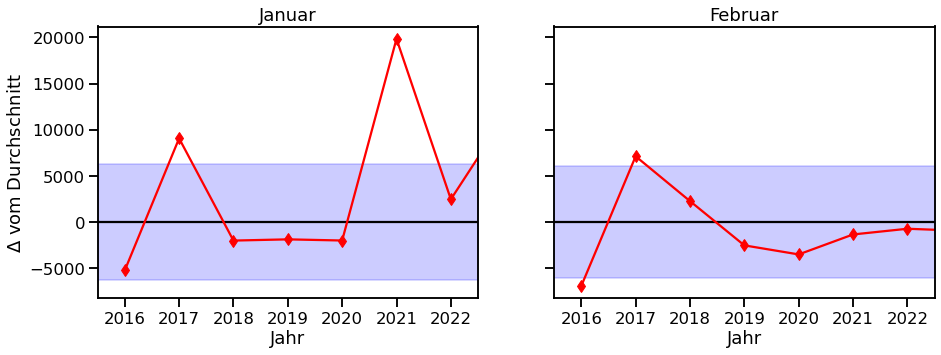

In [6]:
fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 5), sharex = True, sharey=True)
years = df.groupby('Jahr').sum()

for month, ax in zip(['Januar', 'Februar'], axes.ravel()):

    month_mean = years.loc[pre_pandemic_years][month].mean()
    month_std =  years.loc[pre_pandemic_years][month].std()
    
    ax.plot(xlims, 
             np.zeros(len(xlims)),
            'k-')
    
    (years[month] - month_mean).plot(marker = 'd', 
                                    linestyle = '-', 
                                    color = 'red',
                                    ax = ax)
    
    ax.fill_between(xlims, 
                    -month_std, 
                     month_std, 
                    color ='blue',
                   alpha = 0.2)
    
    ax.set_title(month)
    ax.set_ylabel(u'$\Delta$ vom Durchschnitt')
    ax.set_xlim(xlims)